In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [4]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [5]:
# Create a synthetic anomalous image
anomalous_image = np.random.rand(28 * 28)

In [7]:
# Build the AutoEncoder model
model = keras.Sequential([
    # Encoder: Reduce dimensionality, learn the most important features
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)), # Reducing dimension to 128
    keras.layers.Dense(64, activation='relu'), # Further reducing dimension to 64
    keras.layers.Dense(32, activation='relu'), # Further reducing to the most compact form (bottleneck layer)

    # Decoder: Reconstruct the image from the reduced representation
    keras.layers.Dense(64, activation='relu'), # Start expanding dimension
    keras.layers.Dense(128, activation='relu'), # Continue expanding dimension
    keras.layers.Dense(x_train.shape[1], activation='sigmoid') # Restore to original image size
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='mse')

In [9]:
history = model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0930 - val_loss: 0.0365
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0334 - val_loss: 0.0254
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0245 - val_loss: 0.0211
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0209 - val_loss: 0.0188
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0188 - val_loss: 0.0174
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0175 - val_loss: 0.0163
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0140 - val_loss: 0.0134
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━

In [15]:
# Function to calculate reconstruction loss
def calculate_reconstruction_loss(data, model):
    reconstructions = model.predict(data)
    reconstruction_errors = np.mean(np.abs(data - reconstructions), axis=1)
    return reconstruction_errors

In [11]:
# Evaluate the model
reconstruction_loss_normal = calculate_reconstruction_loss(x_test, model)
reconstruction_loss_anomalous = calculate_reconstruction_loss(np.array([anomalous_image]), model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [13]:
# Print average reconstruction loss
print(f"Average Reconstruction Loss for Normal Data: {np.mean(reconstruction_loss_normal)}")
print(f"Reconstruction Loss for Anomalous Data: {reconstruction_loss_anomalous[0]}")

Average Reconstruction Loss for Normal Data: 0.03425858914852142
Reconstruction Loss for Anomalous Data: 0.4613266828669521


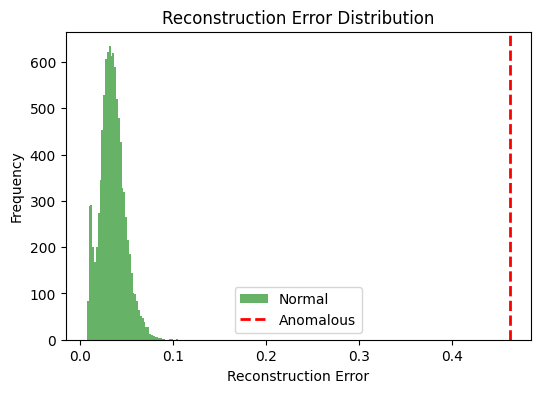

In [14]:
# Visualization of reconstruction error distribution
plt.figure(figsize=(6, 4))
plt.hist(reconstruction_loss_normal, bins=50, alpha=0.6, color='g', label='Normal')
plt.axvline(x=reconstruction_loss_anomalous[0], color='r', linestyle='dashed', linewidth=2, label='Anomalous')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()